In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/traffic.csv')

missing_values = df.isnull().sum()
data_types = df.dtypes

# Display
print("Data set:\n", df.head())
print("\nMissing values in each column:\n", missing_values)
print("\nData types of each column:\n", data_types)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data set:
               DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041

Missing values in each column:
 DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

Data types of each column:
 DateTime    object
Junction     int64
Vehicles     int64
ID           int64
dtype: object


In [4]:
unique_junctions = df['Junction'].unique()
num_unique_junctions = len(unique_junctions)

print("Number of unique junctions:", num_unique_junctions)
print("Unique junctions:\n", unique_junctions)

Number of unique junctions: 4
Unique junctions:
 [1 2 3 4]



EDA for Junction 1


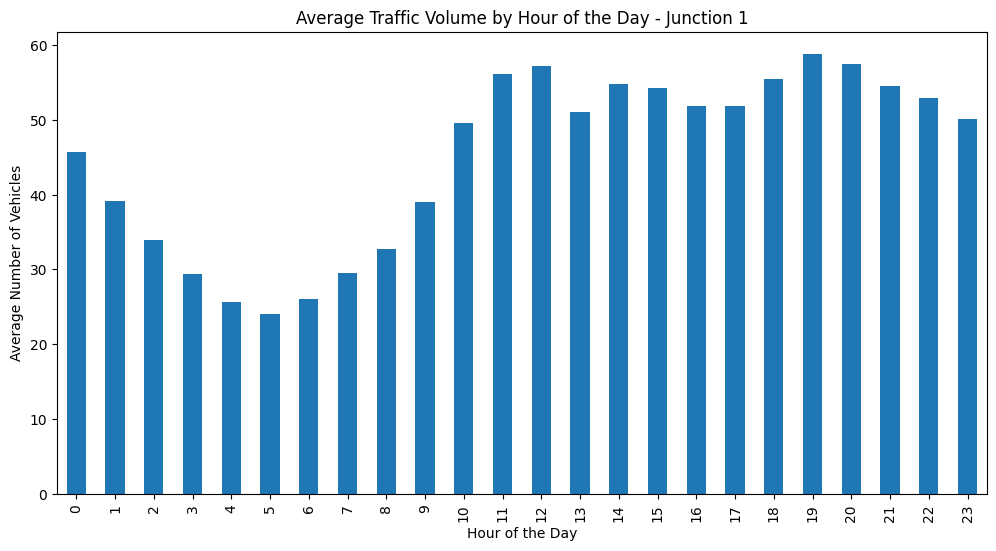


EDA for Junction 2


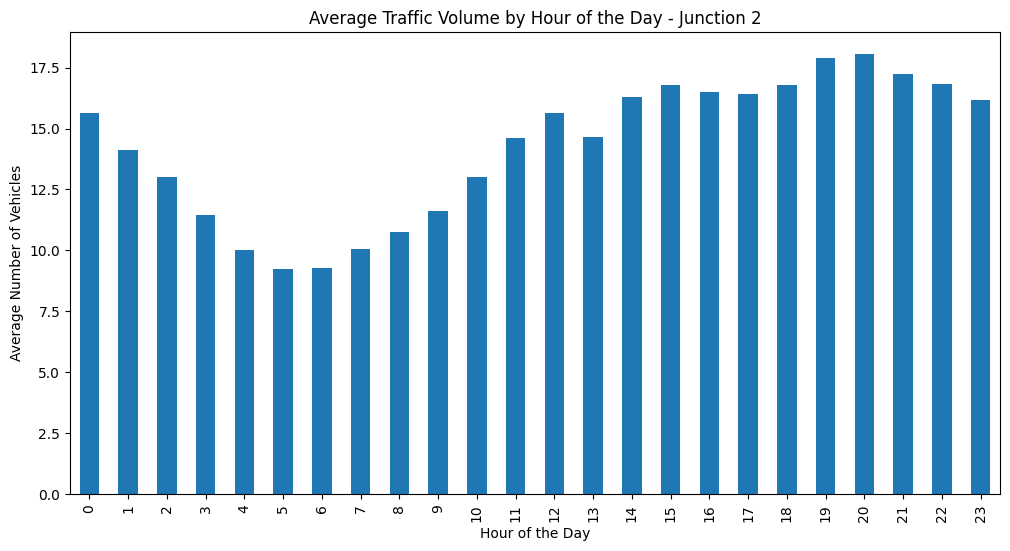


EDA for Junction 3


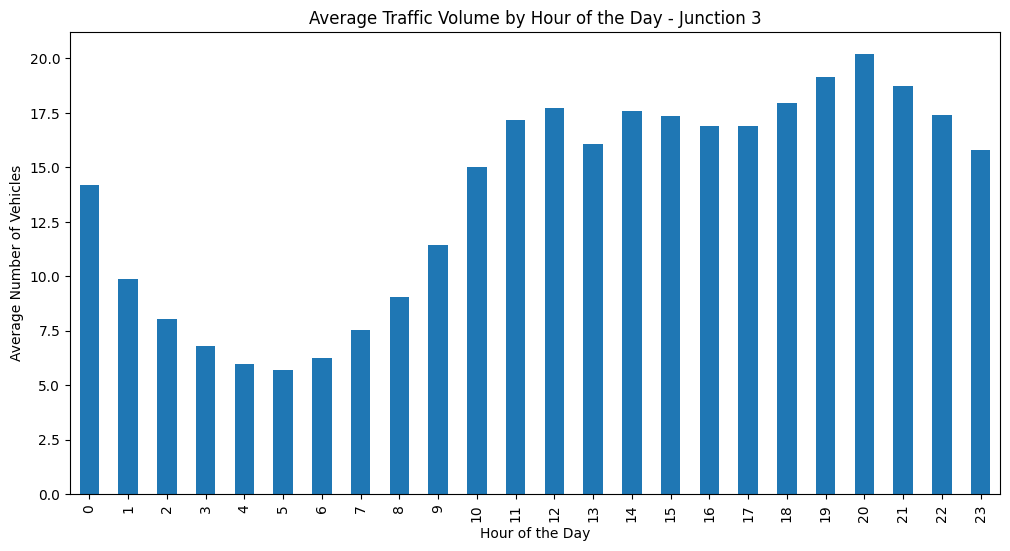


EDA for Junction 4


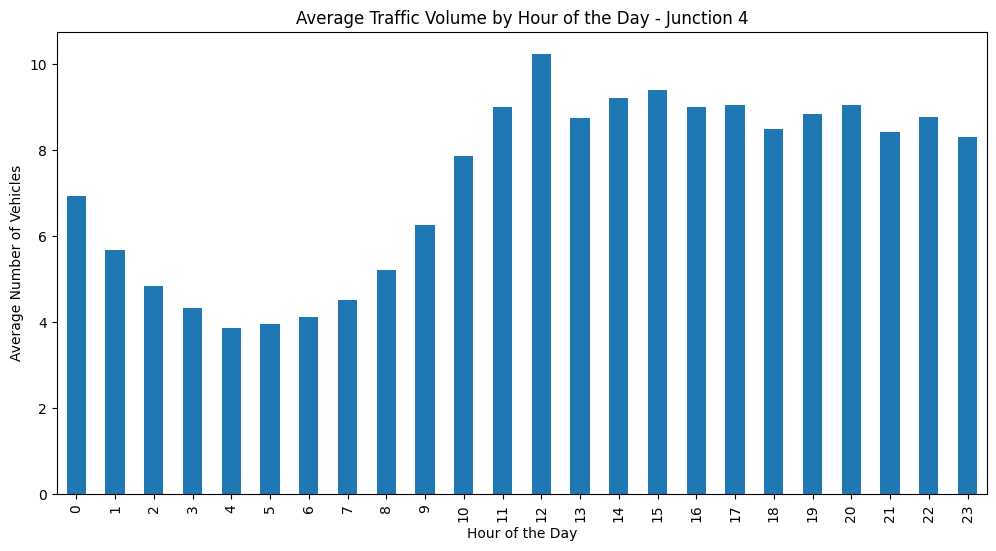

In [7]:
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

df['hour'] = df['DateTime'].dt.hour
df['day_of_week'] = df['DateTime'].dt.dayofweek
df['month'] = df['DateTime'].dt.month
df['year'] = df['DateTime'].dt.year

unique_junctions = df['Junction'].unique()

for junction in unique_junctions:
    print(f"\nEDA for Junction {junction}")

    df_junction = df[df['Junction'] == junction]

    # Traffic patterns by hour of the day
    plt.figure(figsize=(12, 6))
    df_junction.groupby('hour')['Vehicles'].mean().plot(kind='bar')
    plt.title(f'Average Traffic Volume by Hour of the Day - Junction {junction}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Number of Vehicles')
    plt.show()


**Traffic patterns by day of the week**


EDA for Junction 1


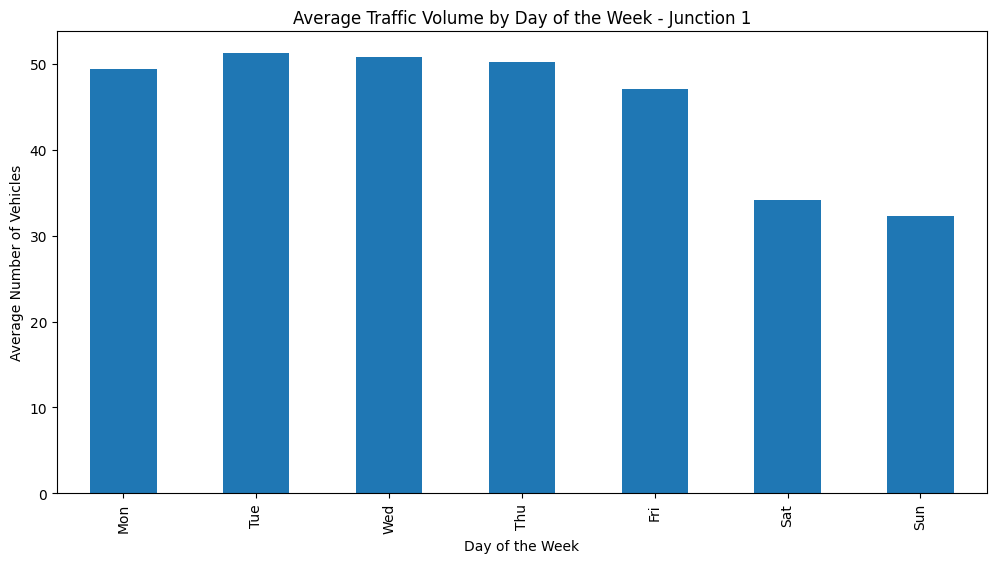


EDA for Junction 2


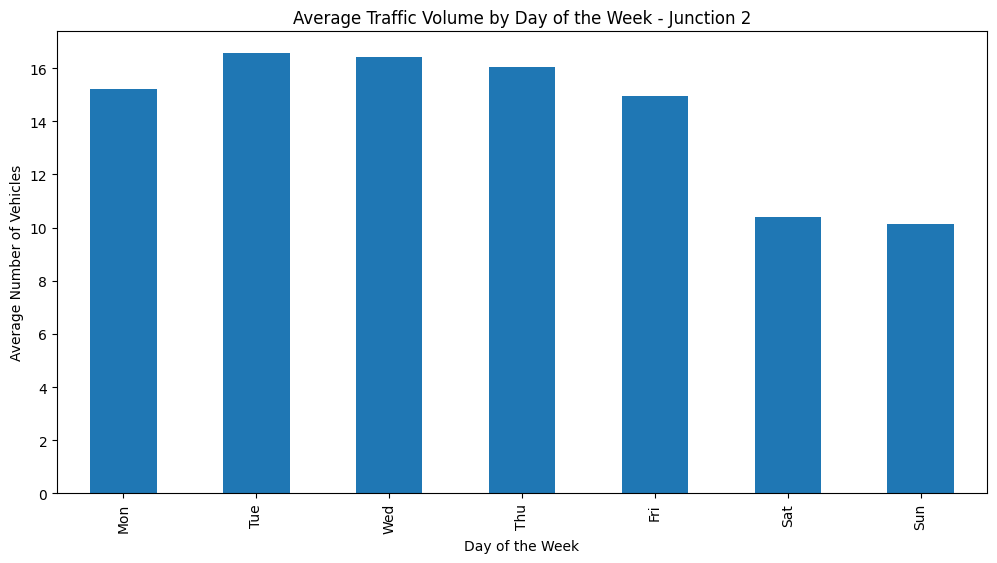


EDA for Junction 3


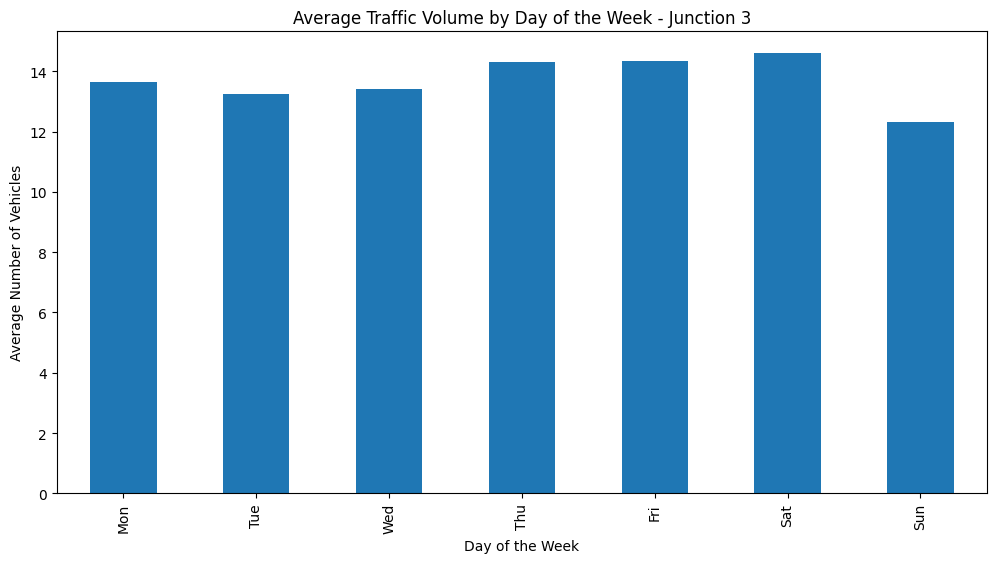


EDA for Junction 4


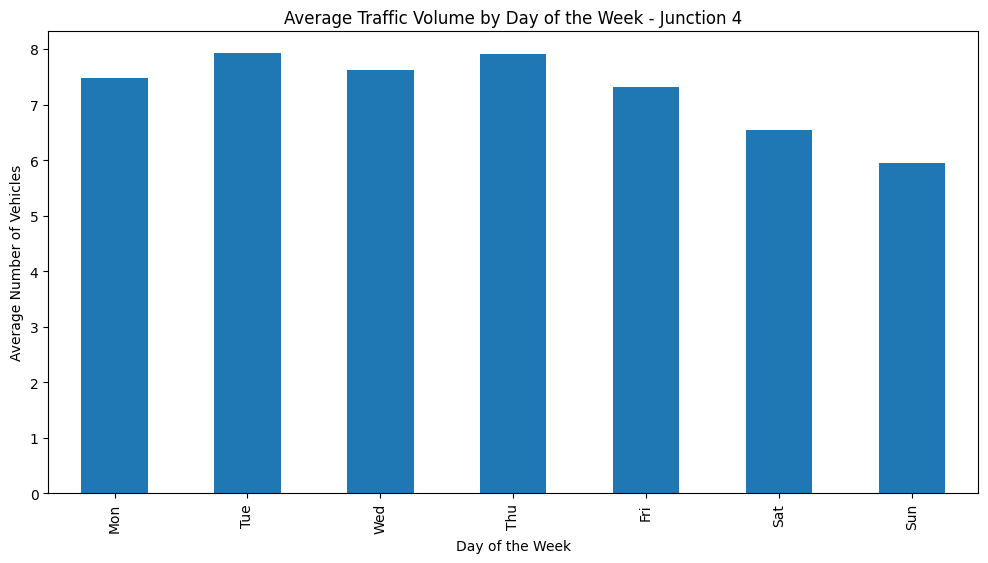

In [8]:
for junction in unique_junctions:
    print(f"\nEDA for Junction {junction}")

    df_junction = df[df['Junction'] == junction]

    plt.figure(figsize=(12, 6))
    df_junction.groupby('day_of_week')['Vehicles'].mean().plot(kind='bar')
    plt.title(f'Average Traffic Volume by Day of the Week - Junction {junction}')
    plt.xlabel('Day of the Week')
    plt.ylabel('Average Number of Vehicles')
    plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.show()

**Traffic patterns by month**


EDA for Junction 1


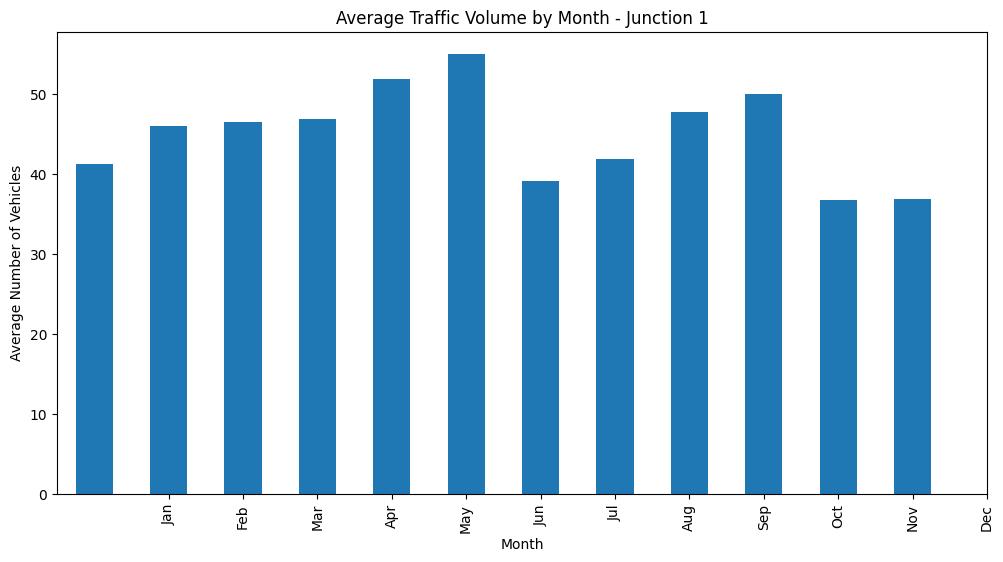


EDA for Junction 2


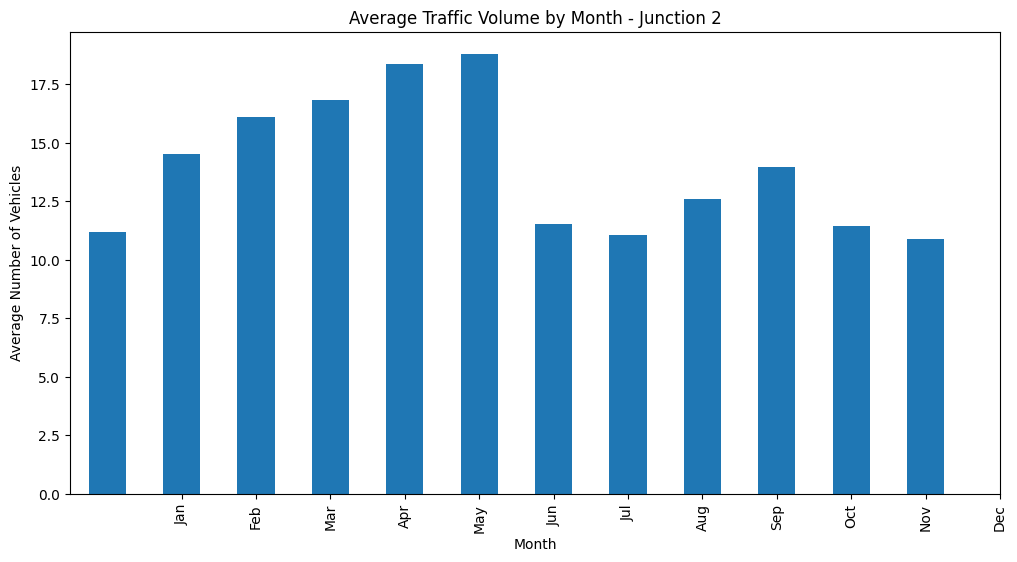


EDA for Junction 3


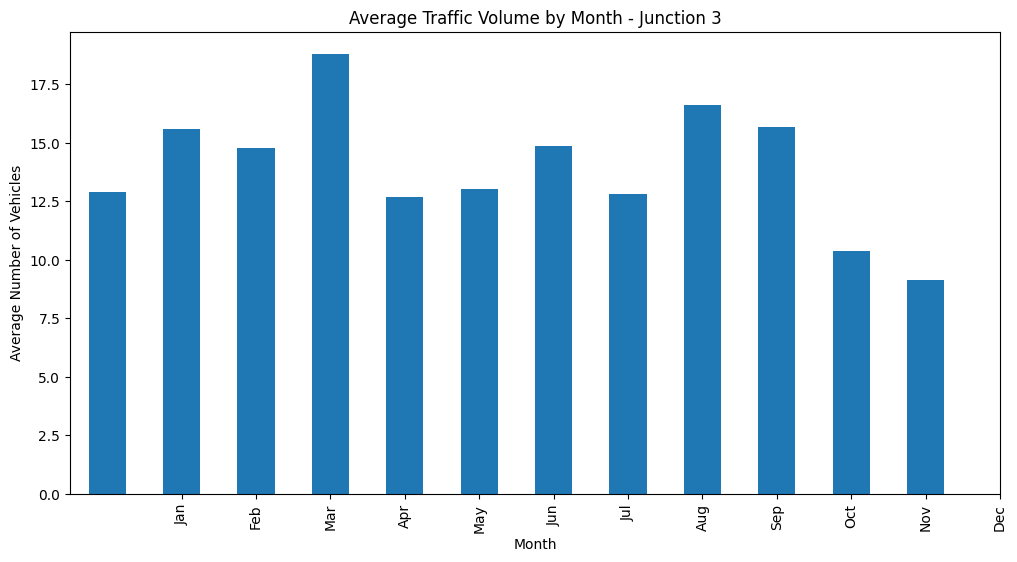


EDA for Junction 4


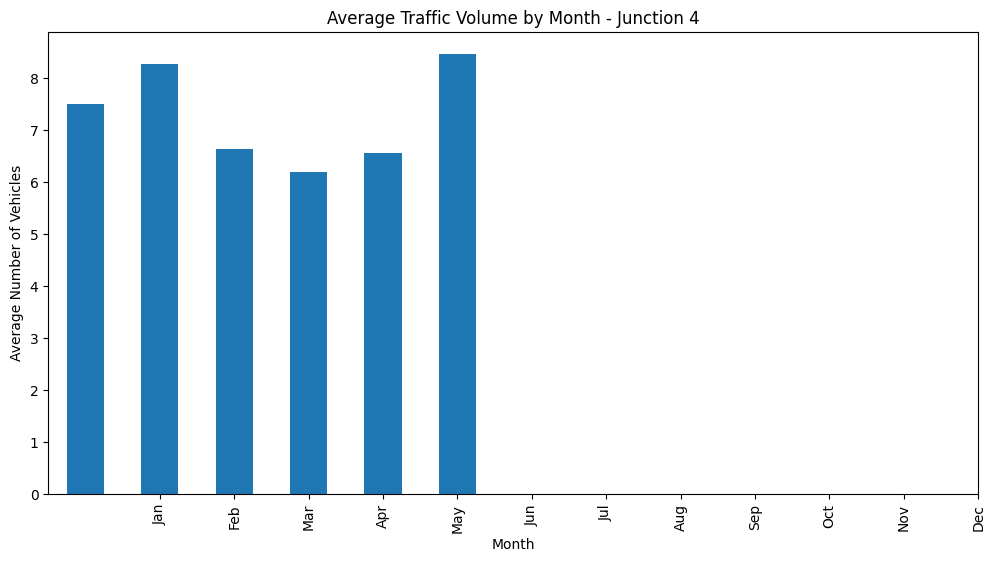

In [9]:
for junction in unique_junctions:
    print(f"\nEDA for Junction {junction}")

    df_junction = df[df['Junction'] == junction]

    plt.figure(figsize=(12, 6))
    df_junction.groupby('month')['Vehicles'].mean().plot(kind='bar')
    plt.title(f'Average Traffic Volume by Month - Junction {junction}')
    plt.xlabel('Month')
    plt.ylabel('Average Number of Vehicles')
    plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()


**Time series plot for the junction**


EDA for Junction 1


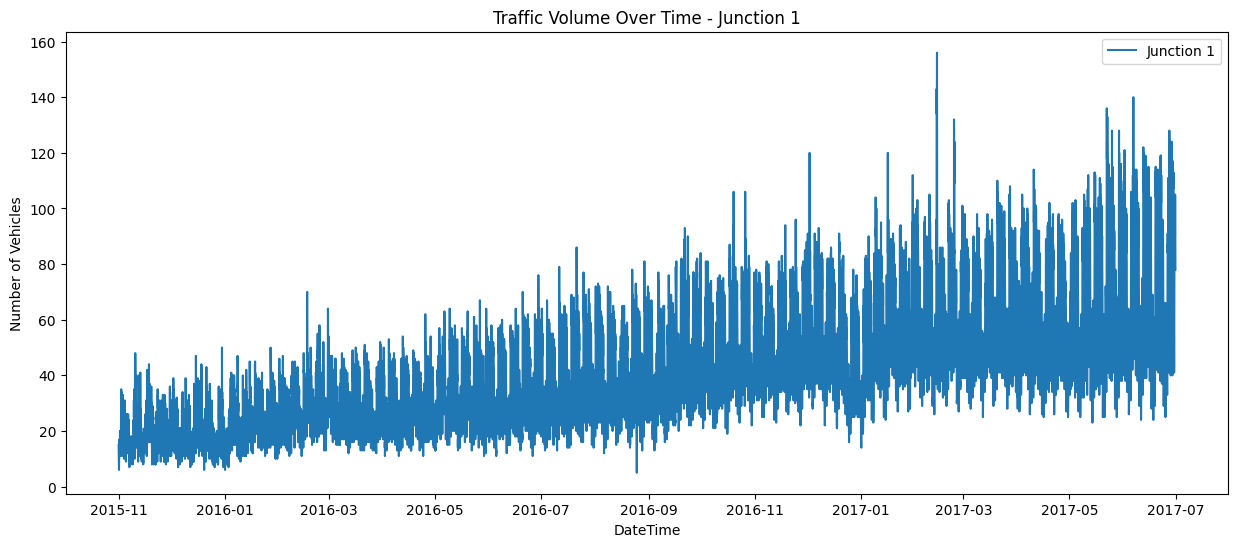


EDA for Junction 2


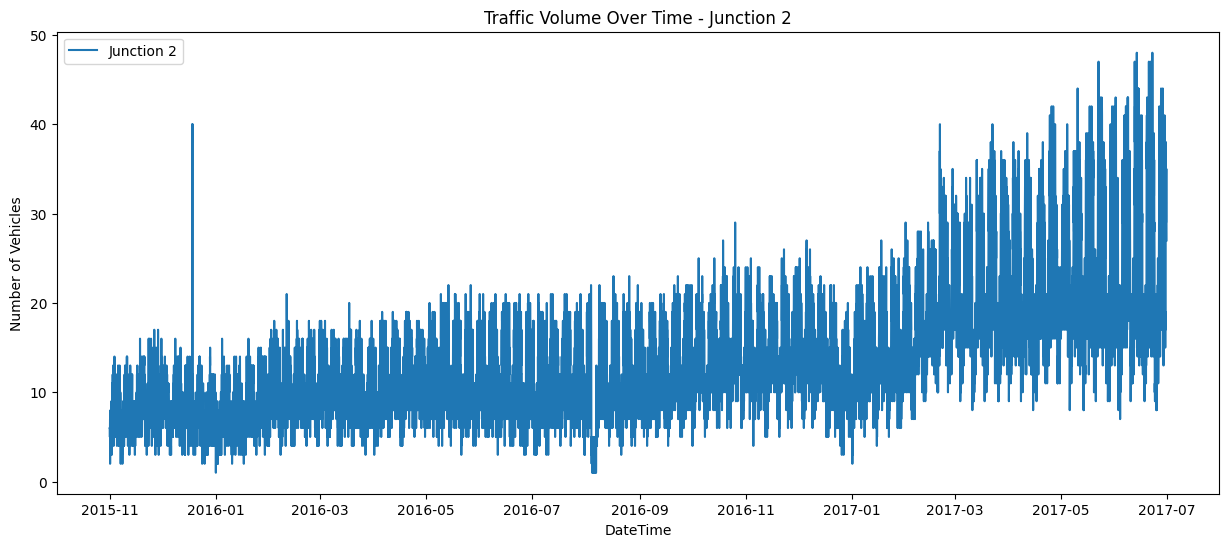


EDA for Junction 3


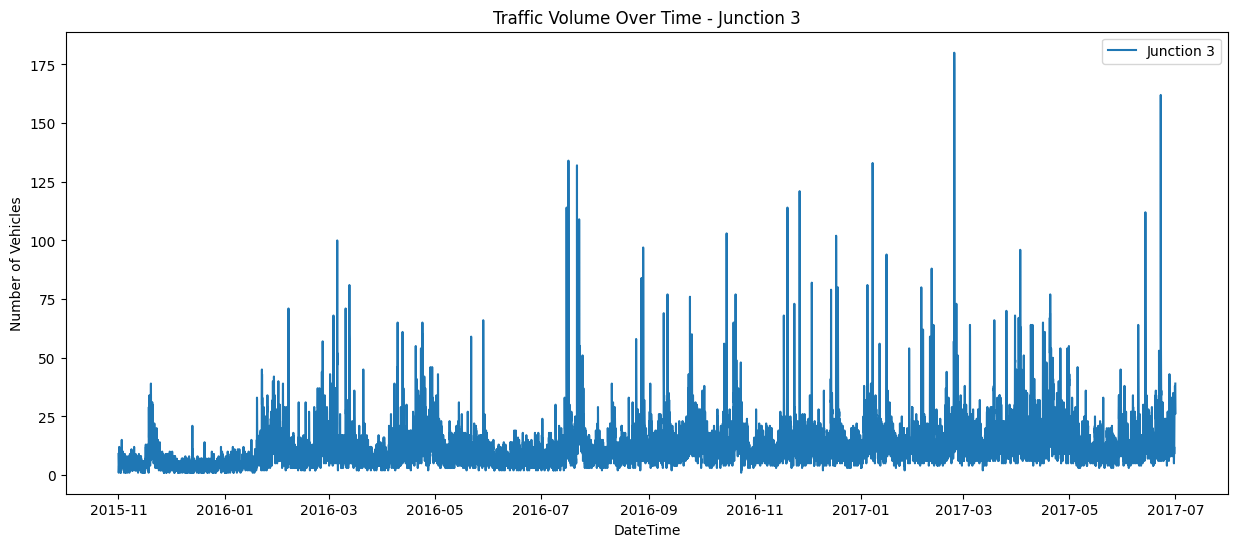


EDA for Junction 4


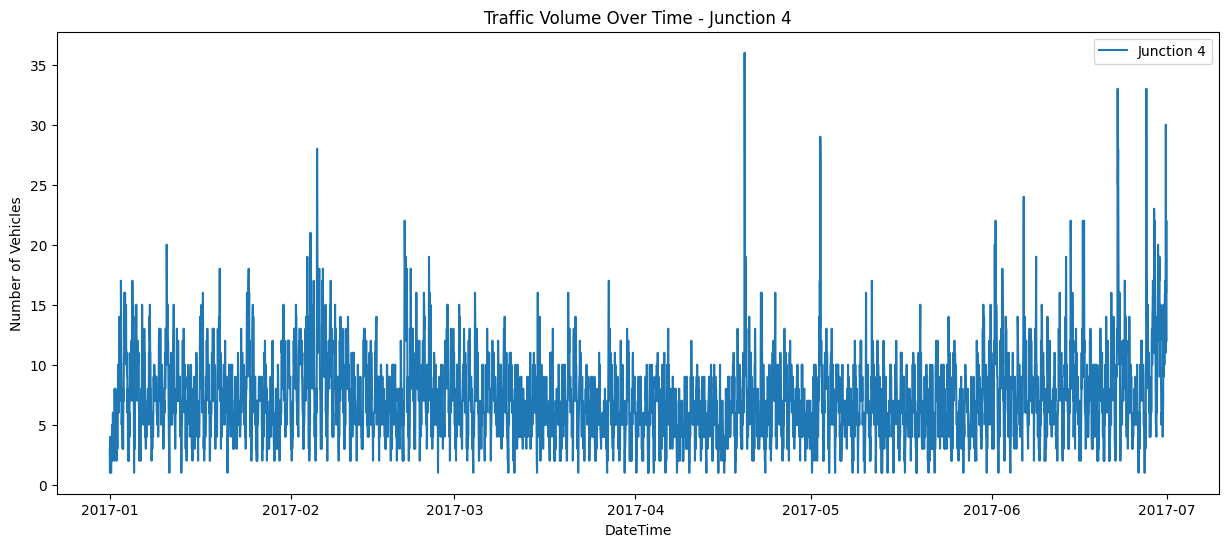

In [10]:
for junction in unique_junctions:
    print(f"\nEDA for Junction {junction}")

    df_junction = df[df['Junction'] == junction]

    plt.figure(figsize=(15, 6))
    plt.plot(df_junction['DateTime'], df_junction['Vehicles'], label=f'Junction {junction}')
    plt.title(f'Traffic Volume Over Time - Junction {junction}')
    plt.xlabel('DateTime')
    plt.ylabel('Number of Vehicles')
    plt.legend()
    plt.show()


**Heatmap of traffic volume by hour of the day and day of the week**


EDA for Junction 1


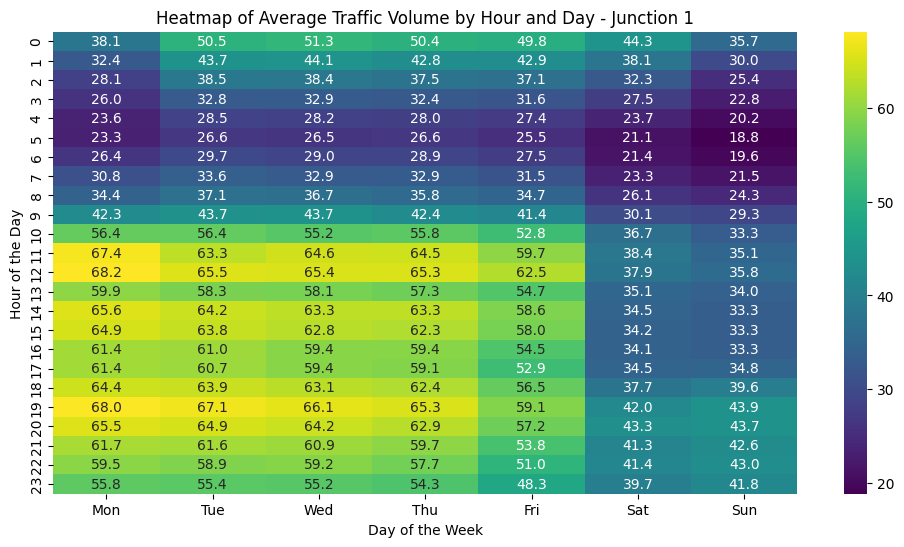


EDA for Junction 2


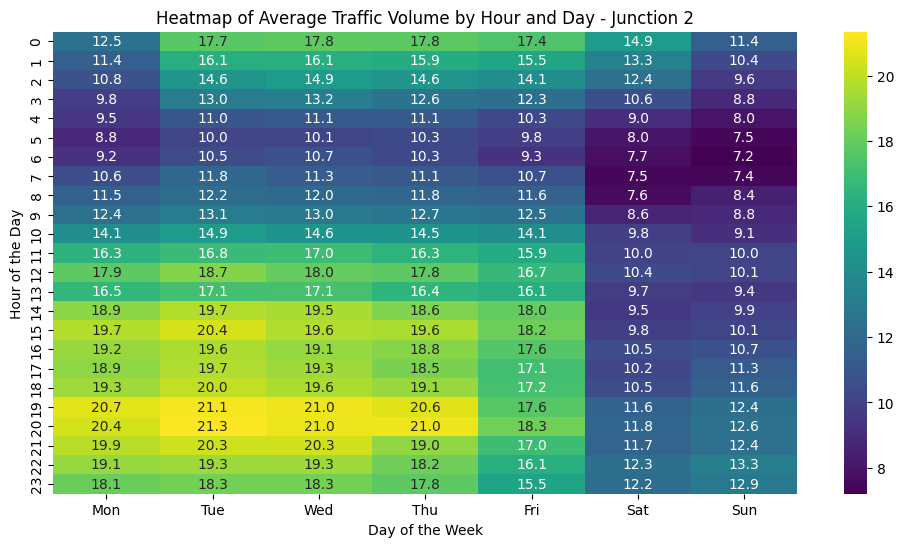


EDA for Junction 3


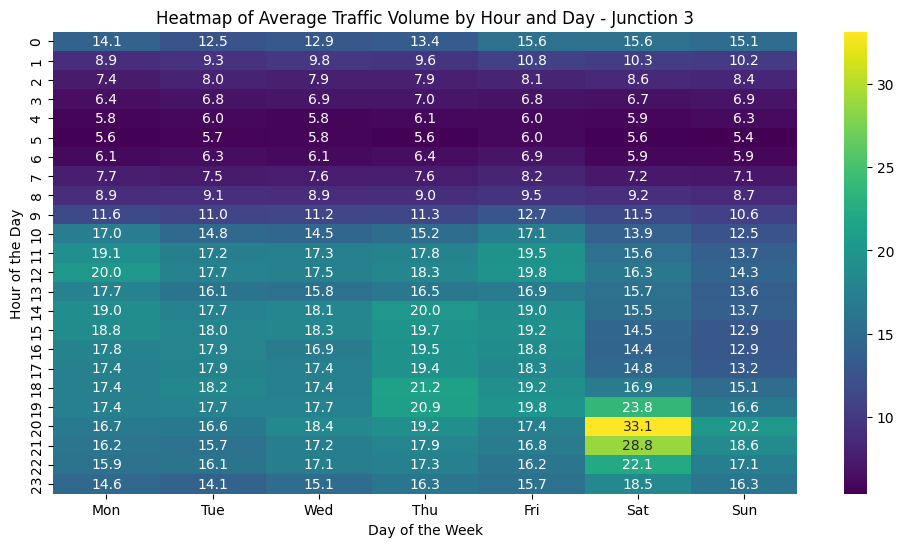


EDA for Junction 4


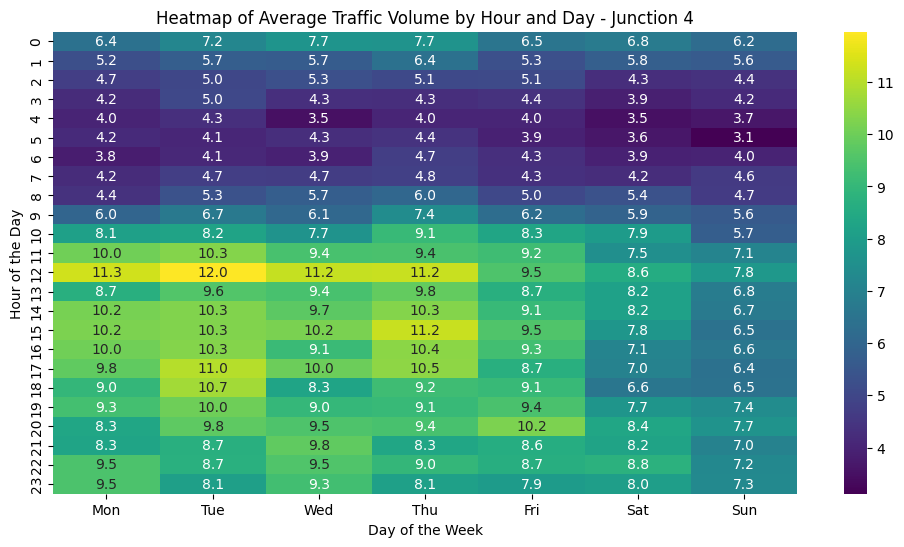

In [11]:
for junction in unique_junctions:
    print(f"\nEDA for Junction {junction}")

    df_junction = df[df['Junction'] == junction]


    heatmap_data = df_junction.groupby(['hour', 'day_of_week'])['Vehicles'].mean().unstack()
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f")
    plt.title(f'Heatmap of Average Traffic Volume by Hour and Day - Junction {junction}')
    plt.xlabel('Day of the Week')
    plt.ylabel('Hour of the Day')
    plt.xticks(ticks=np.arange(7) + 0.5, labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.show()